## The Python Imaging Library (PIL)
The Python Imaging Library, which is known as PIL or PILLOW, is the main library we use in python for dealing with image files. This library is not included with python - it's what's known as a third party library, which means you have to download and install it yourself. In the Coursera system, this has all been done for you. Lets do a little exploring of pillow in the jupyter notebooks.

In [1]:
# You'll recall that we import a library using the `import` keyword.
import PIL

In [2]:
# Documentation is a big help in learning a library. There exist standards that make this process easier. 
# For example, most libraries let you check their version using the version attribute.
PIL.__version__

'7.2.0'

In [3]:
# Let's figure out how to open an image with `Pillow`. Python provides some built-in functions to help us
# understand the functions and objects which are available in libraries. For instance, the help function,
# when called on any object, returns the object’s built-in documentation. Lets try it with our new library
# module, PIL.
help(PIL)

Help on package PIL:

NAME
    PIL - Pillow (Fork of the Python Imaging Library)

DESCRIPTION
    Pillow is the friendly PIL fork by Alex Clark and Contributors.
        https://github.com/python-pillow/Pillow/
    
    Pillow is forked from PIL 1.1.7.
    
    PIL is the Python Imaging Library by Fredrik Lundh and Contributors.
    Copyright (c) 1999 by Secret Labs AB.
    
    Use PIL.__version__ for this Pillow version.
    
    ;-)

PACKAGE CONTENTS
    BdfFontFile
    BlpImagePlugin
    BmpImagePlugin
    BufrStubImagePlugin
    ContainerIO
    CurImagePlugin
    DcxImagePlugin
    DdsImagePlugin
    EpsImagePlugin
    ExifTags
    FitsStubImagePlugin
    FliImagePlugin
    FontFile
    FpxImagePlugin
    FtexImagePlugin
    GbrImagePlugin
    GdImageFile
    GifImagePlugin
    GimpGradientFile
    GimpPaletteFile
    GribStubImagePlugin
    Hdf5StubImagePlugin
    IcnsImagePlugin
    IcoImagePlugin
    ImImagePlugin
    Image
    ImageChops
    ImageCms
    ImageColor
    ImageDr

In [4]:
# This shows us that there are a host of classes available to us in the module, as well as version information 
# and even the file, called __init__.py, which has the source code for the module itself. We could look up 
# the source code for this in the Jupyter console if we wanted to. These documentation standards make it easy
# to poke around an unexplored library.
#
# Python also has a function called dir() which will list the contents of an object. This is especially useful
# with modules where you might want to see what classes you might interact with. Lets list the details of 
# the PIL module
dir(PIL)

['UnidentifiedImageError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_plugins',
 '_raise_version_warning',
 'sys',
 'warnings']

In [5]:
# At the top of the list, there is something called Image. This sounds like it could be interesting, so lets 
# import it directly, and run the help command on it.
from PIL import Image
help(Image)

Help on module PIL.Image in PIL:

NAME
    PIL.Image

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # the Image class wrapper
    #
    # partial release history:
    # 1995-09-09 fl   Created
    # 1996-03-11 fl   PIL release 0.0 (proof of concept)
    # 1996-04-30 fl   PIL release 0.1b1
    # 1999-07-28 fl   PIL release 1.0 final
    # 2000-06-07 fl   PIL release 1.1
    # 2000-10-20 fl   PIL release 1.1.1
    # 2001-05-07 fl   PIL release 1.1.2
    # 2002-03-15 fl   PIL release 1.1.3
    # 2003-05-10 fl   PIL release 1.1.4
    # 2005-03-28 fl   PIL release 1.1.5
    # 2006-12-02 fl   PIL release 1.1.6
    # 2009-11-15 fl   PIL release 1.1.7
    #
    # Copyright (c) 1997-2009 by Secret Labs AB.  All rights reserved.
    # Copyright (c) 1995-2009 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    builtins.Exception(builtins.BaseException)
        DecompressionBombError
    builtins.RuntimeWarning(buil

Running help() on Image tells us that this object is "the Image class wrapper". We see from the top level documentation about the image object that there is "hardly ever any reason to call the Image constructor directly", and they suggest that the open function might be the way to go.

In [6]:
# Lets call help on the open function to see what it's all about. Remember that since we want to pass in the
# function reference, and not run the function itself, we don't put paretheses behind the function name.
help(Image.open)

Help on function open in module PIL.Image:

open(fp, mode='r')
    Opens and identifies the given image file.
    
    This is a lazy operation; this function identifies the file, but
    the file remains open and the actual image data is not read from
    the file until you try to process the data (or call the
    :py:meth:`~PIL.Image.Image.load` method).  See
    :py:func:`~PIL.Image.new`. See :ref:`file-handling`.
    
    :param fp: A filename (string), pathlib.Path object or a file object.
       The file object must implement :py:meth:`~file.read`,
       :py:meth:`~file.seek`, and :py:meth:`~file.tell` methods,
       and be opened in binary mode.
    :param mode: The mode.  If given, this argument must be "r".
    :returns: An :py:class:`~PIL.Image.Image` object.
    :exception FileNotFoundError: If the file cannot be found.
    :exception PIL.UnidentifiedImageError: If the image cannot be opened and
       identified.
    :exception ValueError: If the ``mode`` is not "r", or i

In [12]:
# It looks like Image.open() is a function that loads an image from a file and returns an instance 
# of the Image class. Lets give it a try. In the read_only directory there is an image I've provided
# which is from our Master's of Information program recruitment flyer. Lets try and load that now

file="msi_recruitment.gif"
image=Image.open(file)
print(image)

<PIL.GifImagePlugin.GifImageFile image mode=P size=800x450 at 0x1A8CA906FC8>


In [13]:
# Ok, we see that this returns us a kind of PIL.GifImagePlugin.GifImageFile. At first this might
# seem a bit confusing, since because we were told by the docs that we should be exepcting a
# PIL.Image.Image object back. But this is just object inheritance working! In fact, the object
# returned is both an Image and a GifImageFile. We can use the python inspect module to see this
# as the getmro function will return a list of all of the classes that are being inherited by a
# given object. Lets try it.

import inspect
print("The type of the image is " + str(type(image)))
inspect.getmro(type(image))

The type of the image is <class 'PIL.GifImagePlugin.GifImageFile'>


(PIL.GifImagePlugin.GifImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

In [14]:
help(image.show)

Help on method show in module PIL.Image:

show(title=None, command=None) method of PIL.GifImagePlugin.GifImageFile instance
    Displays this image. This method is mainly intended for debugging purposes.
    
    This method calls :py:func:`PIL.ImageShow.show` internally. You can use
    :py:func:`PIL.ImageShow.register` to override its default behaviour.
    
    The image is first saved to a temporary file. By default, it will be in
    PNG format.
    
    On Unix, the image is then opened using the **display**, **eog** or
    **xv** utility, depending on which one can be found.
    
    On macOS, the image is opened with the native Preview application.
    
    On Windows, the image is opened with the standard PNG display utility.
    
    :param title: Optional title to use for the image window, where possible.



In [15]:
# Now that we are comfortable with the object. How do we view the image? It turns out that the
# image object has a show function. You can find this by looking at all of the properties of
# the object if you wanted to, using the dir() function.
image.show()

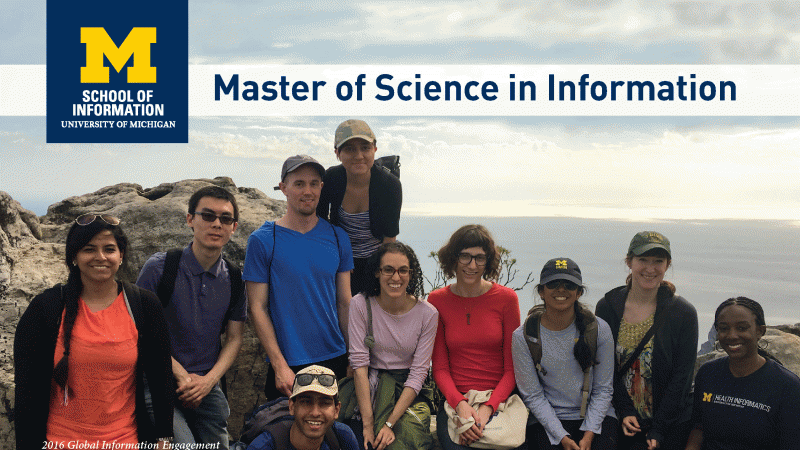

In [16]:
# Hrm, that didn't seem to have the intended effect. The problem is that the image is stored
# remotely, on Coursera's server, but show tries to show it locally to you. So, if the Coursera
# server software was running on someone's workstation in Mountain View California, where Coursera
# has its offices, then you just popped up a picture of our recruitment materials. Thanks! :)
# Instead, we want to render the image in the Jupyter notebook. It turns out Jupyter has a function
# which can help with this.
from IPython.display import display
display(image)

For those who would like to understand this in more detail, the Jupyter environment is running a special wrapper around the Python interpretor, called IPython. IPython allows the kernel back end to communicate with a browser front end, among other things. The IPython package has a display function which can take objects and use custom formatters in order to render them. A number of formatters are provided by default, including one which knows how to handle image types.

That's a quick overview of how to read and display images using pillow, in the next lecture we'll jump in a bit more detail to understand how to use pillow to manipulate images.

## Common Functions in the Python Imaging Library
Lets take a look at some of the common tasks we can do in python using the pillow library.

In [18]:
# First, lets import the PIL library and the Image object
import PIL
from PIL import Image
# And lets import the display functionality
from IPython.display import display
# And finally, lets load the image we were working with last time
file="msi_recruitment.gif"
image=Image.open(file)

In [19]:
# Great, now lets check out a few more methods of the image library. First, we'll look at copy
# And if you remember, we can do this using the built in python help() function
help(image.copy)

Help on method copy in module PIL.Image:

copy() method of PIL.GifImagePlugin.GifImageFile instance
    Copies this image. Use this method if you wish to paste things
    into an image, but still retain the original.
    
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



In [20]:
# We can see that copy takes no arguments, and that the return object is an Image object itself. Now lets
# look at save
help(image.save)

Help on method save in module PIL.Image:

save(fp, format=None, **params) method of PIL.GifImagePlugin.GifImageFile instance
    Saves this image under the given filename.  If no format is
    specified, the format to use is determined from the filename
    extension, if possible.
    
    Keyword options can be used to provide additional instructions
    to the writer. If a writer doesn't recognise an option, it is
    silently ignored. The available options are described in the
    :doc:`image format documentation
    <../handbook/image-file-formats>` for each writer.
    
    You can use a file object instead of a filename. In this case,
    you must always specify the format. The file object must
    implement the ``seek``, ``tell``, and ``write``
    methods, and be opened in binary mode.
    
    :param fp: A filename (string), pathlib.Path object or file object.
    :param format: Optional format override.  If omitted, the
       format to use is determined from the filename ext

In [21]:
# The save method has a couple of parameters which are interesting. The first, called fp, is the filename
# we want to save the object too. The second, format, is interesting, it allows us to change the type of
# the image, but the docs tell us that this should be done automatically by looking at the file extension
# as well. Lets give it a try -- this file was originally a GifImageFile, but I bet if we save it with a
# .png format and read it in again we'll get a different kind of file
image.save("msi_recruitment.png")
image=Image.open("msi_recruitment.png")
import inspect
inspect.getmro(type(image))

(PIL.PngImagePlugin.PngImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

In [22]:
# Indeed, this created a new file, which we could view by going to the Jupyter notebook file list by clicking
# on the logo at the top of the browser, and we can see this new object is actually a PngImageFile object
# For the purposes of this class the difference in image formats isn't so important, but it's nice that you can
# explore how a library works using the functions of help(), dir() and getmro().
#
# The PILLOW library also has some nice image filters to add some effects. It does this through the filter()
# function. The filter() function takes a Filter object, and those are all stored in the ImageFilter object.
# Lets take a look.
from PIL import ImageFilter
help(ImageFilter)

Help on module PIL.ImageFilter in PIL:

NAME
    PIL.ImageFilter

DESCRIPTION
    # The Python Imaging Library.
    # $Id$
    #
    # standard filters
    #
    # History:
    # 1995-11-27 fl   Created
    # 2002-06-08 fl   Added rank and mode filters
    # 2003-09-15 fl   Fixed rank calculation in rank filter; added expand call
    #
    # Copyright (c) 1997-2003 by Secret Labs AB.
    # Copyright (c) 1995-2002 by Fredrik Lundh.
    #
    # See the README file for information on usage and redistribution.
    #

CLASSES
    builtins.object
        Filter
            ModeFilter
            MultibandFilter
                BoxBlur
                BuiltinFilter
                    BLUR
                    CONTOUR
                    DETAIL
                    EDGE_ENHANCE
                    EDGE_ENHANCE_MORE
                    EMBOSS
                    FIND_EDGES
                    Kernel
                    SHARPEN
                    SMOOTH
                    SMOOTH_MORE
          

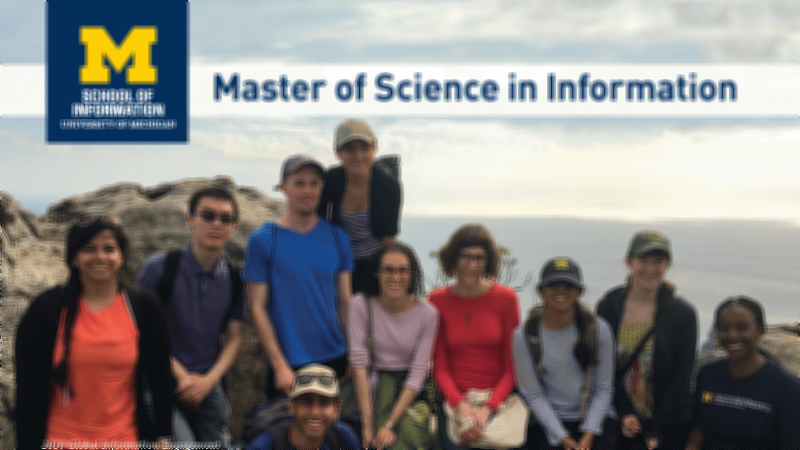

In [23]:
# There are a bunch of different filters here, but lets just try and apply the BLUR filter. Before we do this
# we have to convert the image to RGB mode. This is a bit magical -- images like gifs are limited in how many
# colors can be displayed at once based on the size of the pallet. This is similar to a painters pallet, which
# only has so much room. This is actually a very old image file format. If we convert the image into something
# more sophisticated we can apply these interesting image transforms. Sometimes learning a new library means
# digging a bit deeper into the domain the library is about. We can convert the image using the convert()
# function.
image=image.convert('RGB') # this stands for red, green blue mode
blurred_image=image.filter(PIL.ImageFilter.BLUR)
display(blurred_image)

In [24]:
# Ok, let me show you one more function in the lecture, which is crop(). This removes portions of the image
# except for the bounding box you describe. When you think of images, think of individual dots or pixels
# which make up that image being lined up in a grid. You can actually see the number of pixels high the image
# is and the width of the image 
print("{}x{}".format(image.width, image.height))

800x450


In [25]:
# This means that the image is 800 pixels wide (the X axis), and 450 pixels high (the Y axis). If we take a 
# look at the crop documentation we see that the first parameter to the function is a tuple which is the 
# left, upper, right, and lower values of the X/Y coordinates
help(image.crop)

Help on method crop in module PIL.Image:

crop(box=None) method of PIL.Image.Image instance
    Returns a rectangular region from this image. The box is a
    4-tuple defining the left, upper, right, and lower pixel
    coordinate. See :ref:`coordinate-system`.
    
    Note: Prior to Pillow 3.4.0, this was a lazy operation.
    
    :param box: The crop rectangle, as a (left, upper, right, lower)-tuple.
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



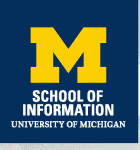

In [26]:
# With PIL images, we define the bounding box using the upper left corner and the lower right corner. And
# we count the number of pixels out from the upper left corner, which is 0,0. This might seem odd if you're
# used to coordinate systems where you start in the lower left -- just remember that we define our box in the
# same way we count out positions in the image.
#
# So, if we wanted to get the Michigan logo out of this image, we might start with the left at, say 50 pixels,
# and the top at 0 pixels, then we might walk to the right another 190 pixels, and set the lower bound to say
# 150 pixels
display(image.crop((50,0,190,150)))

In [27]:
help(ImageDraw.Draw)
dir(ImageDraw.Draw)

NameError: name 'ImageDraw' is not defined

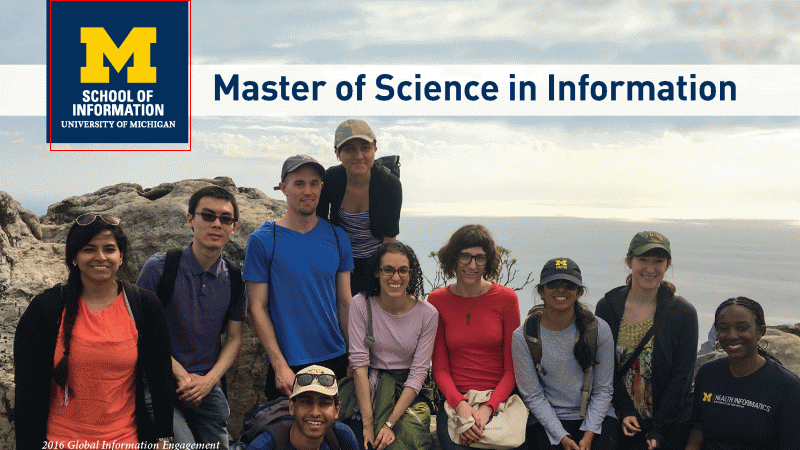

In [28]:
# Of course crop(), like other functions, only returns a copy of the image, and doesn't change the image itself.
# A strategy I like to do is try and draw the bounding box directly on the image, when I'm trying to line things
# up. We can draw on images using the ImageDraw object. I'm not going to go into this in detail, but here's a 
# quick example of how. I might draw the bounding box in this case.
from PIL import ImageDraw
drawing_object=ImageDraw.Draw(image)
drawing_object.rectangle((50,0,190,150), fill = None, outline ='red')
display(image)

Ok, that's been an overview of how to use PIL for single images. But, a lot of work might involve multiple images, and putting images together. In the next lecture we'll tackle that, and set you up for the assignment.

## Additional PILLOW functions
Lets take a look at some other functions we might want to use in PILLOW to modify images.

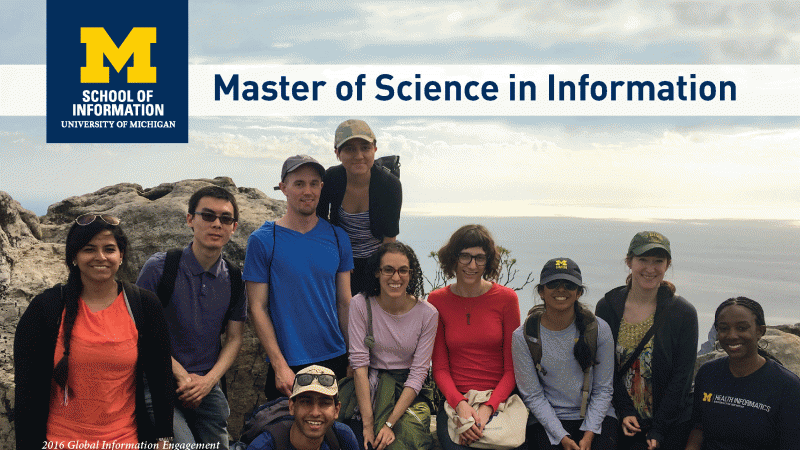

In [2]:
# First, lets import all of the library functions we need
import PIL
from PIL import Image
from IPython.display import display

# And lets load the image we were working, and we can just convert it to RGB inline
file="msi_recruitment.gif"
image=Image.open(file).convert('RGB')

display(image)

In [30]:
# A task that is fairly common in image and picture manipulation is to create contact sheets of images.
# A contact sheet is one image that actually contains several other different images. Lets try and make
# a contact sheet for the Master of Science in Information advertisment image. In particular, lets change
# the brightness of the image in ten different ways, then scale the image down smaller, and put them side
# by side so we can get the sense of which brightness we might want to use.
#
# First up, lets import the ImageEnhance module, which has a nice object called Brightness
from PIL import ImageEnhance
# Checking the online documentation for this function, it takes a value between 0.0 (a completely black
# image) and 1.0 (the original image) to adjust the brightness. All of the classes in the ImageEnhance module
# do this the same way, you create an object, in this case Brightness, then you call the enhance function()
# on that object with an appropriate parameter.
#
# Lets write a little loop to generate ten images of different brightness. First we need the Brightness
# object with our image
enhancer=ImageEnhance.Brightness(image)
images=[]
for i in range(0, 10):
    # We'll divide i by ten to get the decimal value we want, and append it to the images list
    # we actually call the brightness routine by calling the enhance() function. Remember, you can dig into
    # details of this using the help() function, or by consulting web docs
    images.append(enhancer.enhance(i/10))
# We can see the result here is a list of ten PIL.Image.Image objects. Jupyter nicely prints out the value
# of python objects nested in lists
print(images)

[<PIL.Image.Image image mode=RGB size=800x450 at 0x1A8CA984508>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1A8D9C7A408>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1A8D9D8A108>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1A8D9DB5648>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1A8D9DB5AC8>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1A8CA862BC8>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1A8DA0B41C8>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1A8DA0B4348>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1A8DA0B4248>, <PIL.Image.Image image mode=RGB size=800x450 at 0x1A8CA637B08>]


In [31]:
# Lets take these images now and composite them, one above another, in a contact sheet.
# There are several different approaches we can use, but I'll simply create a new image which is like
# the first image, but ten times as high. Lets check out the PIL.Image.new functionality
help(PIL.Image.new)

Help on function new in module PIL.Image:

new(mode, size, color=0)
    Creates a new image with the given mode and size.
    
    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.



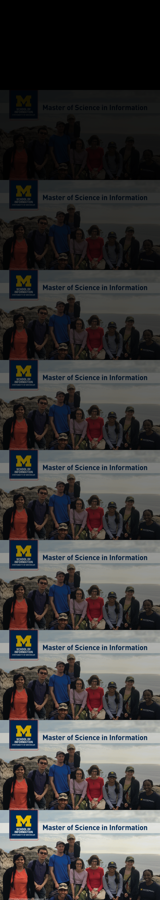

In [32]:
# The new function requires that we pass it a mode. We're going to use the mode 'RGB' which stands for
# Red, Green, and Blue, and is the mode of our current first image. There are lots of different image mode
# formats, and this one is most common.
# For the size we have a tuple, which is the width of the image and the height. We'll use the width of our
# current first image, but for the height we'll multiple this by ten. This will make a sort of "canvas" for
# our contact sheet. Finally, the color is optional, and we'll just leave it at black.
first_image=images[0]
from PIL import Image
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width,10*first_image.height))

# So now we have a black image that's ten times the size of the other images in the contact_sheet
# variable. Now lets just loop through the image list and paste() the results in. The paste() function
# will be called on the contact_sheet object, and takes in a new image to paste, as well as an (x,y)
# offset for that image. In our case, the x position is always 0, but the y location will change by
# 450 pixels each time we iterate through the loop.
#
# Lets first create a counter variable for the y location. It will start at zero
current_location = 0
for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (0, current_location) )
    # And update the current_location counter
    current_location=current_location+450

# This contact sheet has gotten big: 4,500 pixels tall! Lets just resize this sheet for display. We can do
# this using the resize() function. This function just takes a tuple of width and height, and we'll resize
# everything down to the size of just two individual images
contact_sheet = contact_sheet.resize((160,900) )
# Now lets just display that composite image
display(contact_sheet)

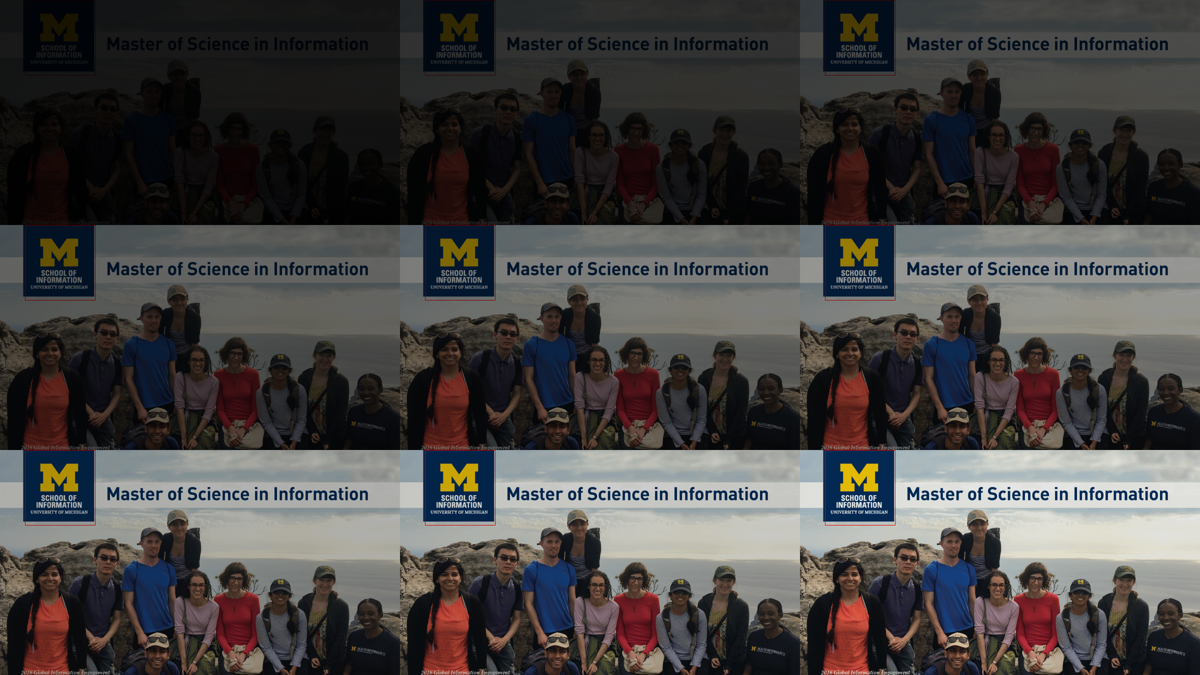

In [33]:
# Ok, that's a nice proof of concept. But it's a little tough to see. Lets instead change this to a three
# by three grid of values. First thing we should do is make our canvas, and we'll make it 3 times the
# width of our image and 3 times the height of our image - a nine image square
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
# Now we want to iterate over our images and place them into this grid. Remember that in PIL we manage the
# location of where we refer to as an image in the upper right hand corner, so this will be 0,0. Lets use
# one variable for the X dimension, and one for the Y dimension.
x=0
y=0

# Now, lets iterate over our images. Except, we don't want to both with the first one, because it is
# just solid black. Instead we want to just deal with the images after the first one, and that should
# give us nine in total
for img in images[1:]:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# Now lets resize the contact sheet. We'll just make it half the size by dividing it by two. And, because
# the resize function needs to take round numbers, we need to convert our divisions from floating point
# numbers into integers using the int() function.
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
# Now lets display that composite image
display(contact_sheet)

Well, that's been a tour of our first external API, the Python Imaging Library, or pillow module. In this series of lectures you've learned how to read and write images, manipulat them with pillow, and explore the functionality of third party APIs using features of Python like dir(), help(), and getmro(). You've also been introduced to the console, and how python stores these libraries on the computer. While for this course all of the libraries are included for you in the Coursera system, and you won't need to install your own, it's good to get a the idea of how this work in case you wanted to set this up on your own.

Finally, while you can explore PILLOW from within python, most good modules also put their documentation up online, and you can read more about PILLOW here: https://pillow.readthedocs.io/en/latest/